In [1]:
#importing essential liabraries for performing EDA and creating visuals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting these display options to prevent truncation during output

pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 180)

In [3]:
#importing the final dataset
df = pd.read_csv("myntra_menswear.csv")

In [4]:
#converting MPR column name in lowercase
df.rename(columns={"MRP": "mrp"}, inplace=True)
#converting column name 'pants_description' to 'products'
df.rename(columns={"pants_description": "products"}, inplace=True)

In [5]:
#setting up some visual styling for data visualizations for a clean visibility
sns.set(style="whitegrid", context='talk')
plt.rcParams['figure.figsize'] = (10,6)

#### _**quick sanity check and outlier detection**_

In [7]:
#extremely high discounts or suspicious pricing
df['high_discount_flag'] = df['effective_discount_percent'] > df['effective_discount_percent'].quantile(0.99)
df['low_price_flag'] = df['price'] < df['price'].quantile(0.01)

#inspect flagged rows
df[df['high_discount_flag']].sort_values('effective_discount_percent', ascending=False).head(30)

,brand_name,products,price,mrp,discount_percent,ratings,number_of_ratings,effective_discount_percent,rating_weighted,value_for_money_score,popularity_index,high_discount_flag,low_price_flag
12065,ANGERHOOD,Men Baggy Mid-Rise Jeans,499.0,3599.0,31.00,4.3,7.0,86.135038,8.941599,8.617234,95.076636,True,False
12066,Calvin Klein Jeans,Men Slim Fit Jeans,499.0,3599.0,31.00,4.3,7.0,86.135038,8.941599,8.617234,95.076636,True,False
12545,ANGERHOOD,Men Mid-Rise Jeans,499.0,3599.0,31.00,3.8,16.0,86.135038,10.766211,7.615230,96.901248,True,False
13656,ANGERHOOD,Men Mid-Rise Jeans,499.0,3599.0,31.00,4.3,38.0,86.135038,15.753315,8.617234,101.888353,True,False
12339,ANGERHOOD,Men Mid-Rise Cotton Jeans,499.0,3599.0,31.00,3.9,31.0,86.135038,13.516370,7.815631,99.651408,True,False
34910,IVOC,Men Jeans,479.0,3199.0,0.85,4.0,53.0,85.026571,15.955936,8.350731,100.982507,True,False
34911,United Colors of Benetton,Men Slim Fit Mid-Rise Jeans,479.0,3199.0,0.85,4.0,53.0,85.026571,15.955936,8.350731,100.982507,True,False
39487,Roadster,Men Relaxed Fit Jeans,539.0,3599.0,0.85,4.5,32.0,85.023618,15.734284,8.348794,100.757902,True,False
13842,Snitch,Relaxed Fit Stretchable Jeans,499.0,3299.0,28.00,4.4,7.0,84.874204,9.149543,8.817635,94.023747,True,False
13875,Calvin Klein Jeans,Men Slim Fit Jeans,499.0,3299.0,28.00,2.1,36.0,84.874204,7.582928,4.208417,92.457132,True,False


#### _**Price and Discount Distribution Analysis**_

Text(0.5, 1.0, 'Log(Price + 1) distribution')

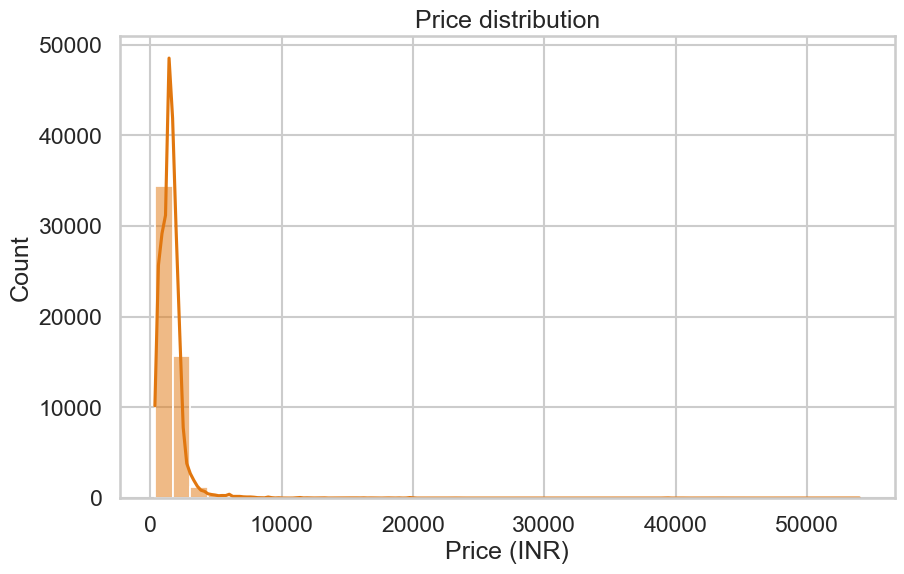

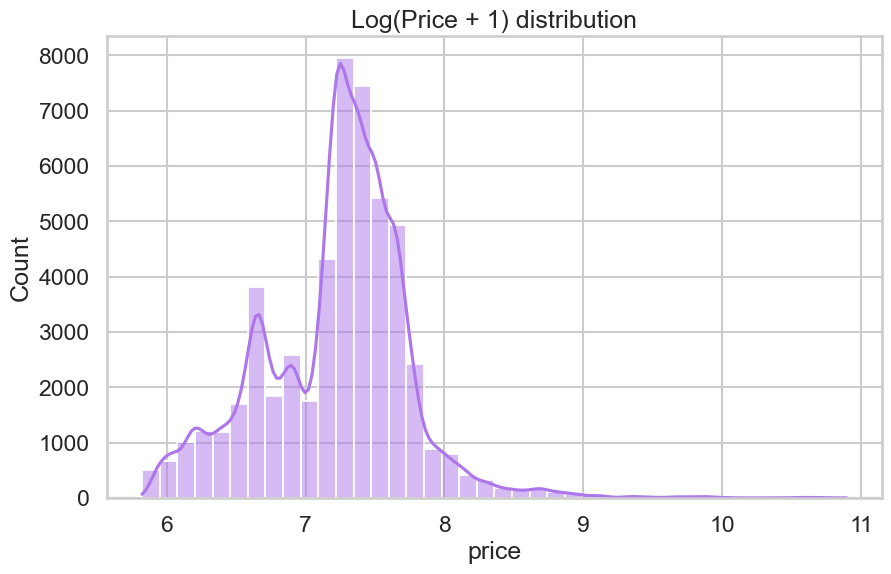

In [8]:
#price distribution and log price
plt.figure()
sns.histplot(df['price'], bins=40, kde=True, color='#e1770f')
plt.title("Price distribution")
plt.xlabel("Price (INR)")

plt.figure()
sns.histplot(np.log1p(df['price']), bins=40, kde=True, color='#ad76ea')
plt.title("Log(Price + 1) distribution")

#### _**Effective Discount Percentage Distribution**_

Text(0.5, 0, 'Discount %')

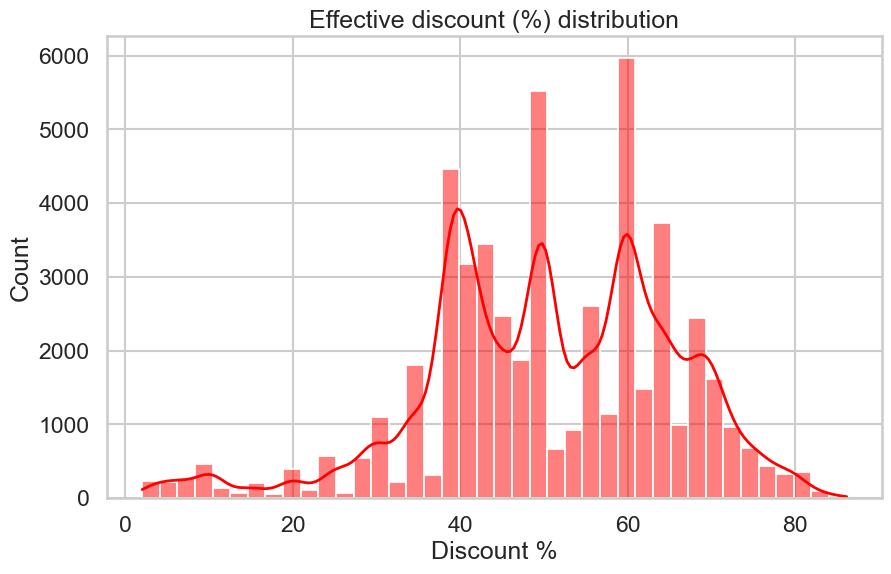

In [9]:
#effective discount percent distribution
plt.figure()
sns.histplot(df['effective_discount_percent'].dropna(), bins=40, kde=True, color='red', line_kws={'linewidth': 2})
plt.title("Effective discount (%) distribution")
plt.xlabel("Discount %")

#### _**Product Rating Distribution by Buckets**_

Text(0.5, 0, 'Rating range')

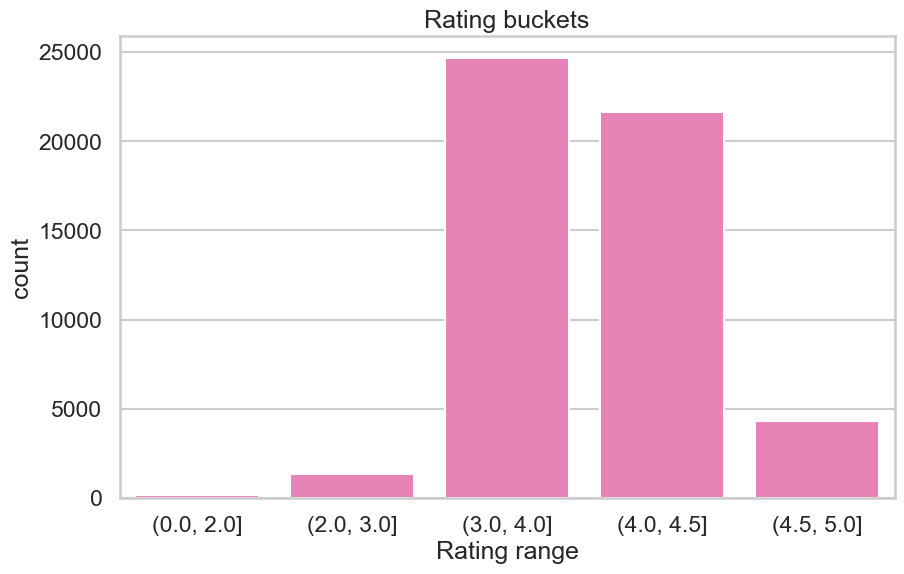

In [10]:
#rating distribution
plt.figure()
sns.countplot(x=pd.cut(df['ratings'], bins=[0,2,3,4,4.5,5]), color='#f572b7')
plt.title("Rating buckets")
plt.xlabel("Rating range")

#### _**Price vs. Popularity Index (Log Scale)**_

Text(0.5, 1.0, 'Price vs Popularity Index')

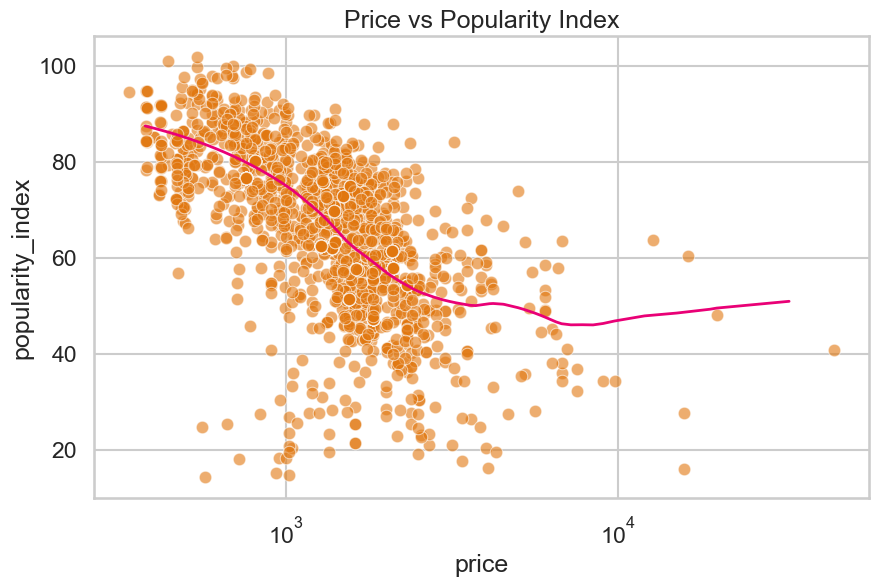

In [11]:
#Price vs Popularity 
plt.figure()
sns.scatterplot(data=df.sample(min(2000, len(df))), x='price', y='popularity_index', alpha=0.6, color='#e1770f')
sns.regplot(data=df.sample(min(2000, len(df))), x='price', y='popularity_index', scatter=False, lowess=True, color='#e90076', line_kws={'linewidth': 2})
plt.xscale('log')
plt.title("Price vs Popularity Index")

#### _**Value-for-Money Score Across Price Ranges**_

Text(0.5, 1.0, 'value-for-money across price buckets')

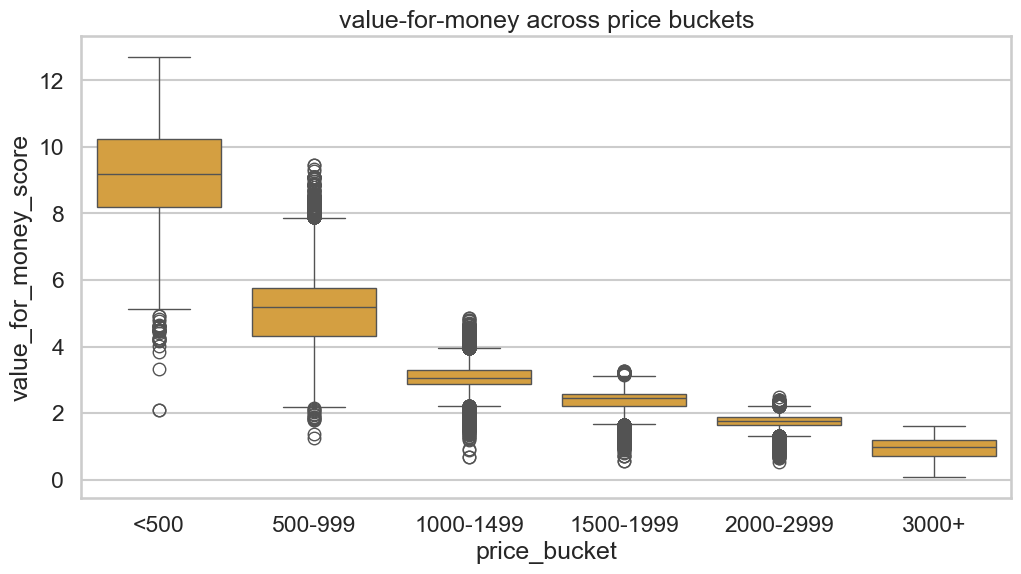

In [12]:
#value_for_money Vs price
df['price_bucket'] = pd.cut(df['price'], bins=[0,499,999,1499,1999,2999,99999],
                           labels=['<500','500-999','1000-1499','1500-1999','2000-2999','3000+'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price_bucket', y='value_for_money_score', color='#eda628')
plt.title("value-for-money across price buckets")

#### _**Discount Elasticity of Product Popularity**_

Text(0.5, 1.0, 'Popularity by Discount Bin')

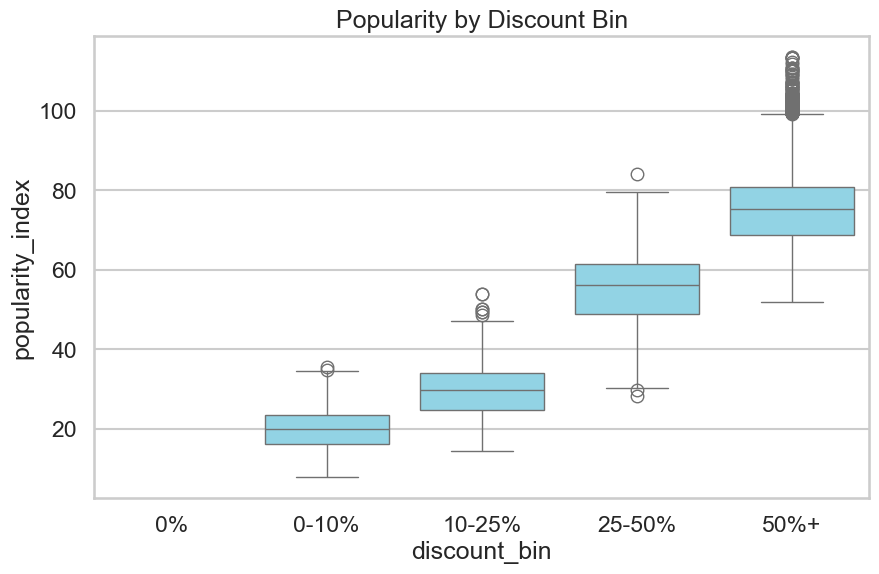

In [13]:
#discount Vs popularity (to determine discount-elasticity)
df['discount_bin'] = pd.cut(df['effective_discount_percent'], 
                            bins=[-1,0,10,25,50,100], 
                            labels=['0%','0-10%','10-25%','25-50%','50%+'])

sns.boxplot(data=df, x='discount_bin', y='popularity_index', color='#84dbf2')
plt.title("Popularity by Discount Bin")

#### _**Relationship Between Rating Count and Weighted Score (Trust)**_

Text(0.5, 1.0, 'Rating weighted vs Number of ratings')

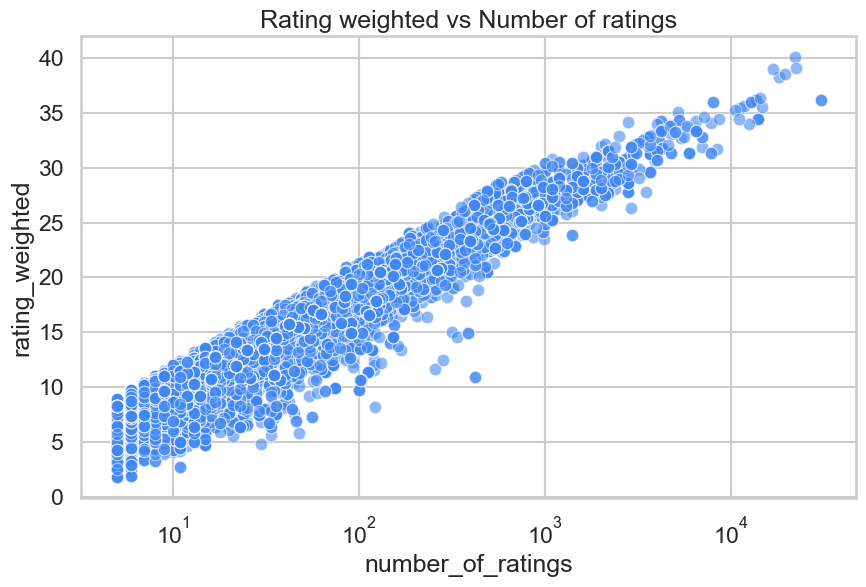

In [14]:
#rating_weighted vs number_of_ratings
plt.figure()
sns.scatterplot(data=df, x='number_of_ratings', y='rating_weighted', alpha=0.6, color='#4187f2')
plt.xscale('log')
plt.title("Rating weighted vs Number of ratings")

#### _**Correlation Matrix of Product Performance Metrics**_

Text(0.5, 1.0, 'Correlation Matrix — Key Numerical Features')

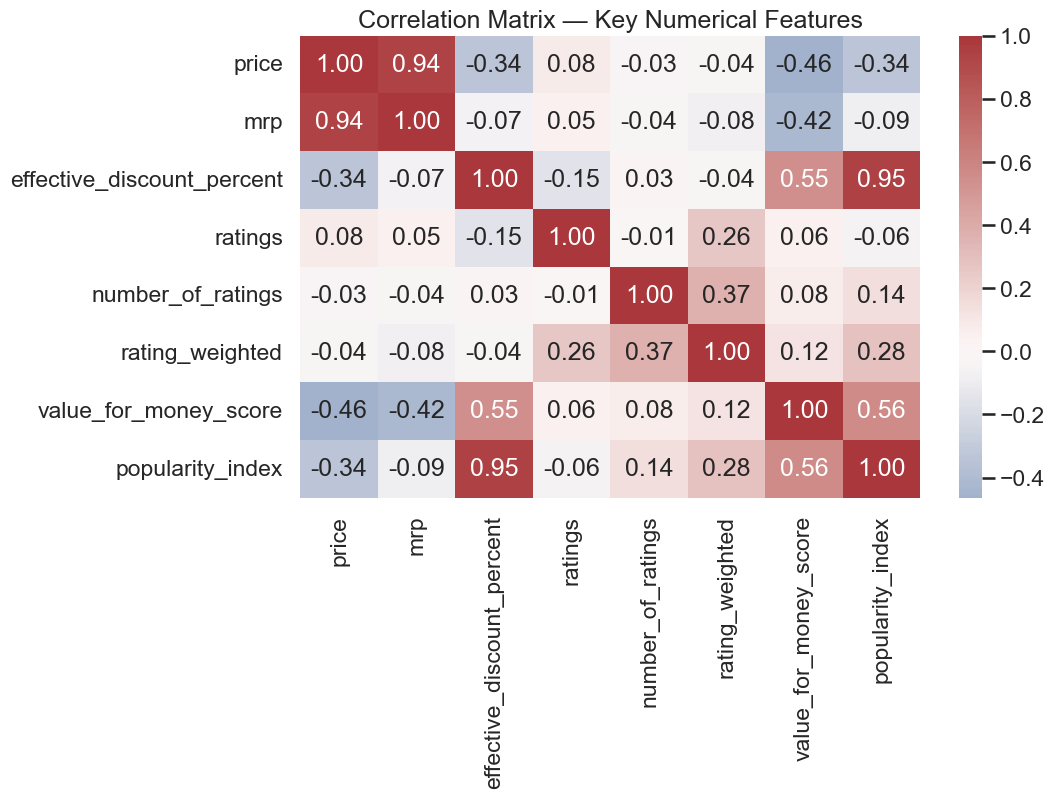

In [15]:
#correlation & heatmap
num_cols = ['price','mrp','effective_discount_percent','ratings','number_of_ratings',
            'rating_weighted','value_for_money_score','popularity_index']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation Matrix — Key Numerical Features")